<a href="https://colab.research.google.com/github/OnkarDharma/Assignment5/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,Conv2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


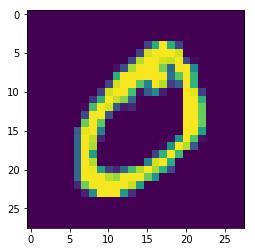

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
#X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [5]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, Y_train, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, Y_train, batch_size=32, shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
test_iterator = datagen.flow(X_test, Y_test, batch_size=32, shuffle=False)
print('Batches train=%d, test=%d' % (len(iterator), len(test_iterator)))

Data Generator mean=0.131, std=0.308
(64, 28, 28, 1) 0.018139785 1.021281
(32, 28, 28, 1) -0.017685253 0.97913945
Batches train=1875, test=313


In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(16, 3, 3, activation='relu', input_shape=(width, height, channels))) #26
model.add(BatchNormalization()) 
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Conv2D(32, 3, 3, activation='relu')) #24
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Conv2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(BatchNormalization())
model.add(Conv2D(16, 3, 3, activation='relu'))#9
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Conv2D(16, 3, 3, activation='relu'))#7
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Conv2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#5
model.add(Dropout(0.1))


model.add(BatchNormalization())
model.add(Conv2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#3
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(iterator,steps_per_epoch=2000, epochs=40, validation_data=test_iterator, validation_steps=800,verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
2000/2000 [==============================] - 31s 16ms/step - loss: 0.7029 - acc: 0.8286 - val_loss: 0.1751 - val_acc: 0.9782
Epoch 2/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.3468 - acc: 0.8992 - val_loss: 0.1019 - val_acc: 0.9867
Epoch 3/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2901 - acc: 0.9159 - val_loss: 0.0988 - val_acc: 0.9859
Epoch 4/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2562 - acc: 0.9246 - val_loss: 0.0767 - val_acc: 0.9878
Epoch 5/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2340 - acc: 0.9312 - val_loss: 0.0705 - val_acc: 0.9907
Epoch 6/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2231 - acc: 0.9351 - val_loss: 0.0686 - val_acc: 0.9889
Epoch 7/40
2000/2000 [==============================] - 28s 14ms/step - loss: 0.2137 - acc: 0.9365 - val_loss: 0.0679 - val_acc: 0.9901


In [13]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[3.4594425060272216, 0.315]
